# Coursework 2 - Part 2


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 2.1: Reading in the datasets (2 marks)
Read columns "country, date, cases" from file "confirmed\_cases\_by\_country.csv" into a dataframe called "cases\_by\_country".
Read columns "is\_china, date, cases" from "confirmed\_cases\_china\_vs\_world.csv" into a dataframe called "cases\_all". Rename the column "is\_china" to "country" (hint you may use .rename()). Then split this dataframe into two new ones: cases in China ("cases\_china") and cases elsewhere ("cases\_not\_china"). 

In [15]:
cases_by_country=pd.read_csv('confirmed_cases_by_country.csv',header=0,usecols=['country','date','cases'])

In [16]:
cases_all=pd.read_csv('confirmed_cases_china_vs_world.csv',header=0,usecols=['is_china','date','cases'])
cases_all.rename(columns={'is_china':'country'},inplace=True)
cases_china=cases_all[cases_all.country=='China']
cases_not_china=cases_all[cases_all.country=='Not China']

### 2.2: Summarising the total number of confirmed cases by country (3 marks)
Obtain the January records for "cases\_by\_country" and "cases\_china" and summarise cases in China against cases in other countries in a dataframe for this month. Repeat this procedure for February and March. 
Create a bar plot to compare cases in China with cases in the 5 countries with most cases outside China for January, February and March. 


In [19]:
# January
jan1=cases_by_country[cases_by_country.date.str.contains('2020-01')]
jan2=cases_china[cases_china.date.str.contains('2020-01')]
jan=jan1[['country','cases']].set_index('country').sum(axis=0,level='country')
jan=jan.append(jan2[['country','cases']].set_index('country').sum(axis=0,level='country'))
# February
feb1=cases_by_country[cases_by_country.date.str.contains('2020-02')]
feb2=cases_china[cases_china.date.str.contains('2020-02')]
feb=feb1[['country','cases']].set_index('country').sum(axis=0,level='country')
feb=feb.append(feb2[['country','cases']].set_index('country').sum(axis=0,level='country'))
# March
march1=cases_by_country[cases_by_country.date.str.contains('2020-03')]
march2=cases_china[cases_china.date.str.contains('2020-03')]
march=march1[['country','cases']].set_index('country').sum(axis=0,level='country')
march=march.append(march2[['country','cases']].set_index('country').sum(axis=0,level='country'))

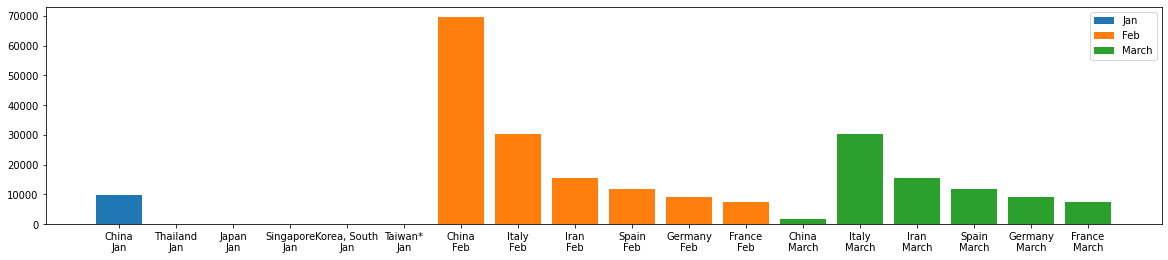

In [20]:
t1=pd.concat([jan[jan.index=='China'],jan[jan.index!='China'].sort_values(by=['cases'],ascending=False).head(5)])
t2=pd.concat([feb[feb.index=='China'],march[feb.index!='China'].sort_values(by=['cases'],ascending=False).head(5)])
t3=pd.concat([march[march.index=='China'],march[march.index!='China'].sort_values(by=['cases'],ascending=False).head(5)])
fig = plt.figure(figsize=(20,4))
ax=plt.subplot(111)
ax.bar(t1.index+'\nJan',t1.cases)
ax.bar(t2.index+'\nFeb',t2.cases)
ax.bar(t3.index+'\nMarch',t3.cases)
ax.legend(('Jan','Feb','March'))

### 2.3: Plotting the accumulated cases by date (2 marks)

Add a new column called "acc\_cases" in both  "cases\_not\_china" and "cases\_china" dataframes, which contains the accumulated number of cases by date. Create a time series plot for "acc\_cases" column in "cases\_not\_china" dataframe.

In [22]:
cases_not_china['acc_cases']=cases_not_china['cases'].cumsum(axis=0)
cases_china['acc_cases']=cases_china['cases'].cumsum(axis=0)

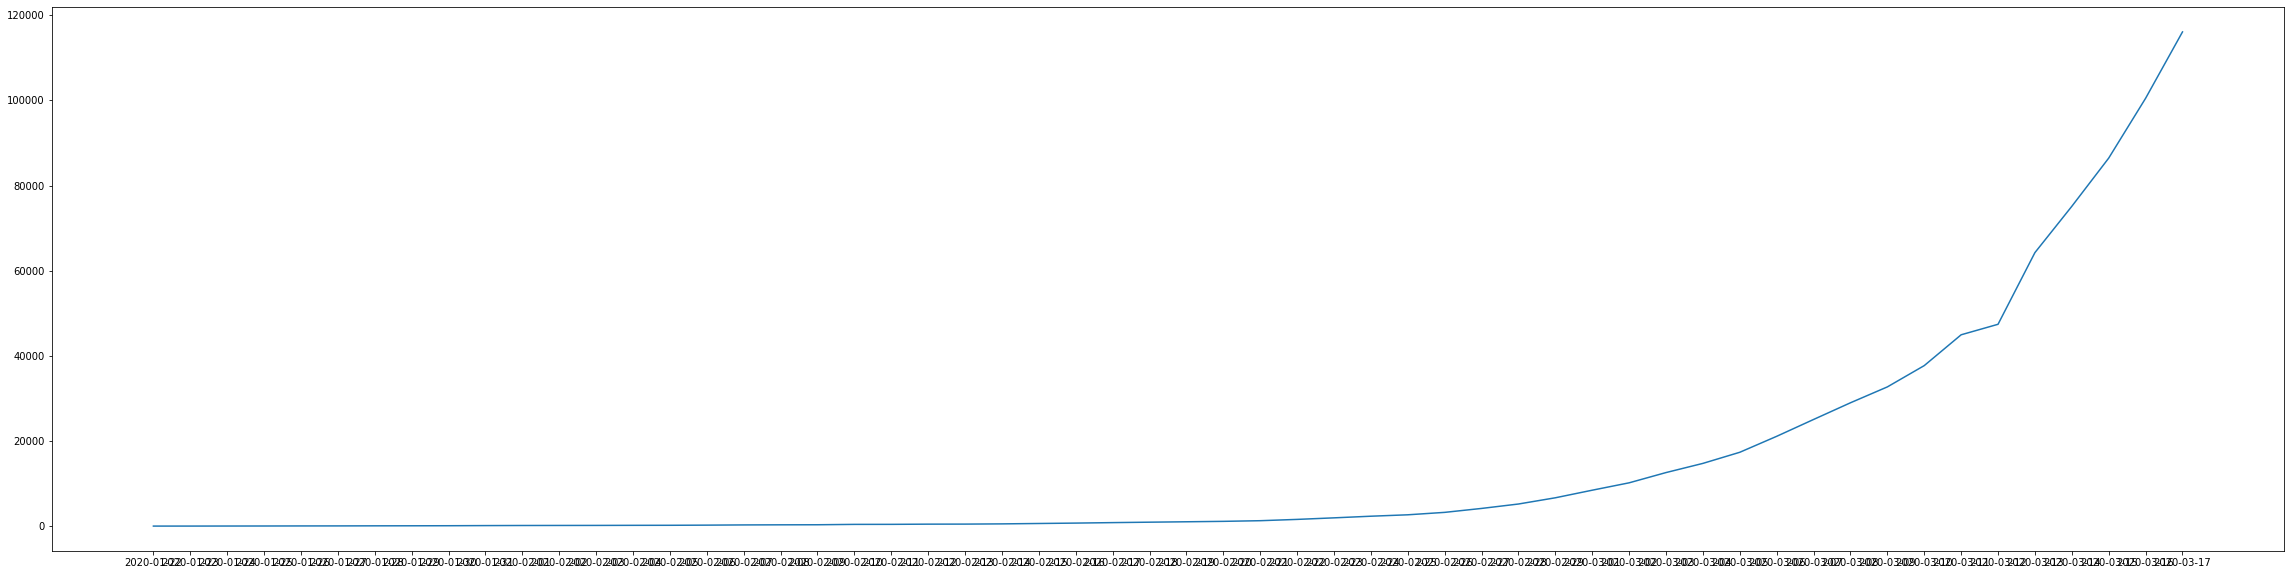

In [27]:
fig = plt.figure(figsize=(40,10))
plt.plot(cases_not_china.date,cases_not_china.acc_cases)

### 2.4: Analysing across countries (3 marks)
When the number of COVID-19 cases became higher than 10,000 in China, what was the number of cases for all other counties in that day? Print the 5 countries with highest number of cases. 


During the first 5 days that the daily cases in China dropped below 100, what is average number of cases for other countries? Report the top 5 countries with average number of cases.

In [28]:
cases_by_country[cases_by_country.date.values==cases_china[cases_china.cases>10000].date.values].sort_values(by=['cases'],ascending=False).head(5)

,country,date,cases
5331,Singapore,2020-02-13,8
5356,Vietnam,2020-02-13,1
5294,Malaysia,2020-02-13,1
5364,US,2020-02-13,1
5214,Afghanistan,2020-02-13,0


In [29]:
cases_by_country[cases_by_country.date.isin(cases_china[cases_china.cases<100].date.head(5))][['country','cases']].set_index('country').mean(axis=0,level='country').sort_values(by=['cases'],ascending=False).head(5)

,cases
country,
Italy,925.8
Iran,485.8
"Korea, South",210.8
Spain,134.6
Germany,101.2
